## Driving value with a data-driven approach to Toyota Corolla Pricing!

After wrapping up a successful big-data project in Toyota’s supply chain excellence center, you’re ready for a fresh challenge. A leading used-car dealership is aiming to sharpen its pricing strategy for pre-owned Toyota Corollas—one of the world’s best-selling cars. Because of your recent success track, your manager assigned you to lead this project. 

Customers often ask why similar Corollas are priced so differently. To keep prices fair and transparent, you’ll develop a data-driven model that predicts a Corolla’s market price based on mileage, age, horsepower, fuel type, and more. Using decision trees, ensemble methods (e.g. random forests and gradient boosting), and support vector machines, you’ll uncover which features matter most, identify the best predictive approach, and justify your results. 

Most questions are open ended and gives the opportunity to develop this project with your learnings. Please utilize what we have learned in class as well as per your individual studies. For example, you can review the previous in-class jupyter notebooks to get guidance on which metrics, graphs, what sort of questions you can ask and answer to respond the assignment questions. Use the "ToyotaCorolla.csv" dataset for all questions. Please submit your error-free jupyter notebook as well as a PDF/HTML version of your jupyter notebook. 

Do not share outside of this class.

#### Q1: Data Inspection and Cleaning

What initial observations can you make about the dataset's features, missing values, and basic stats?

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('ToyotaCorolla.csv')

In [11]:
print("Dataset Info:")
print(df.info())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Checking missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


A good number of the columns are based on categorical information, which is showed by the distributions between 0 and 1.

IndexError: index 36 is out of bounds for axis 0 with size 36

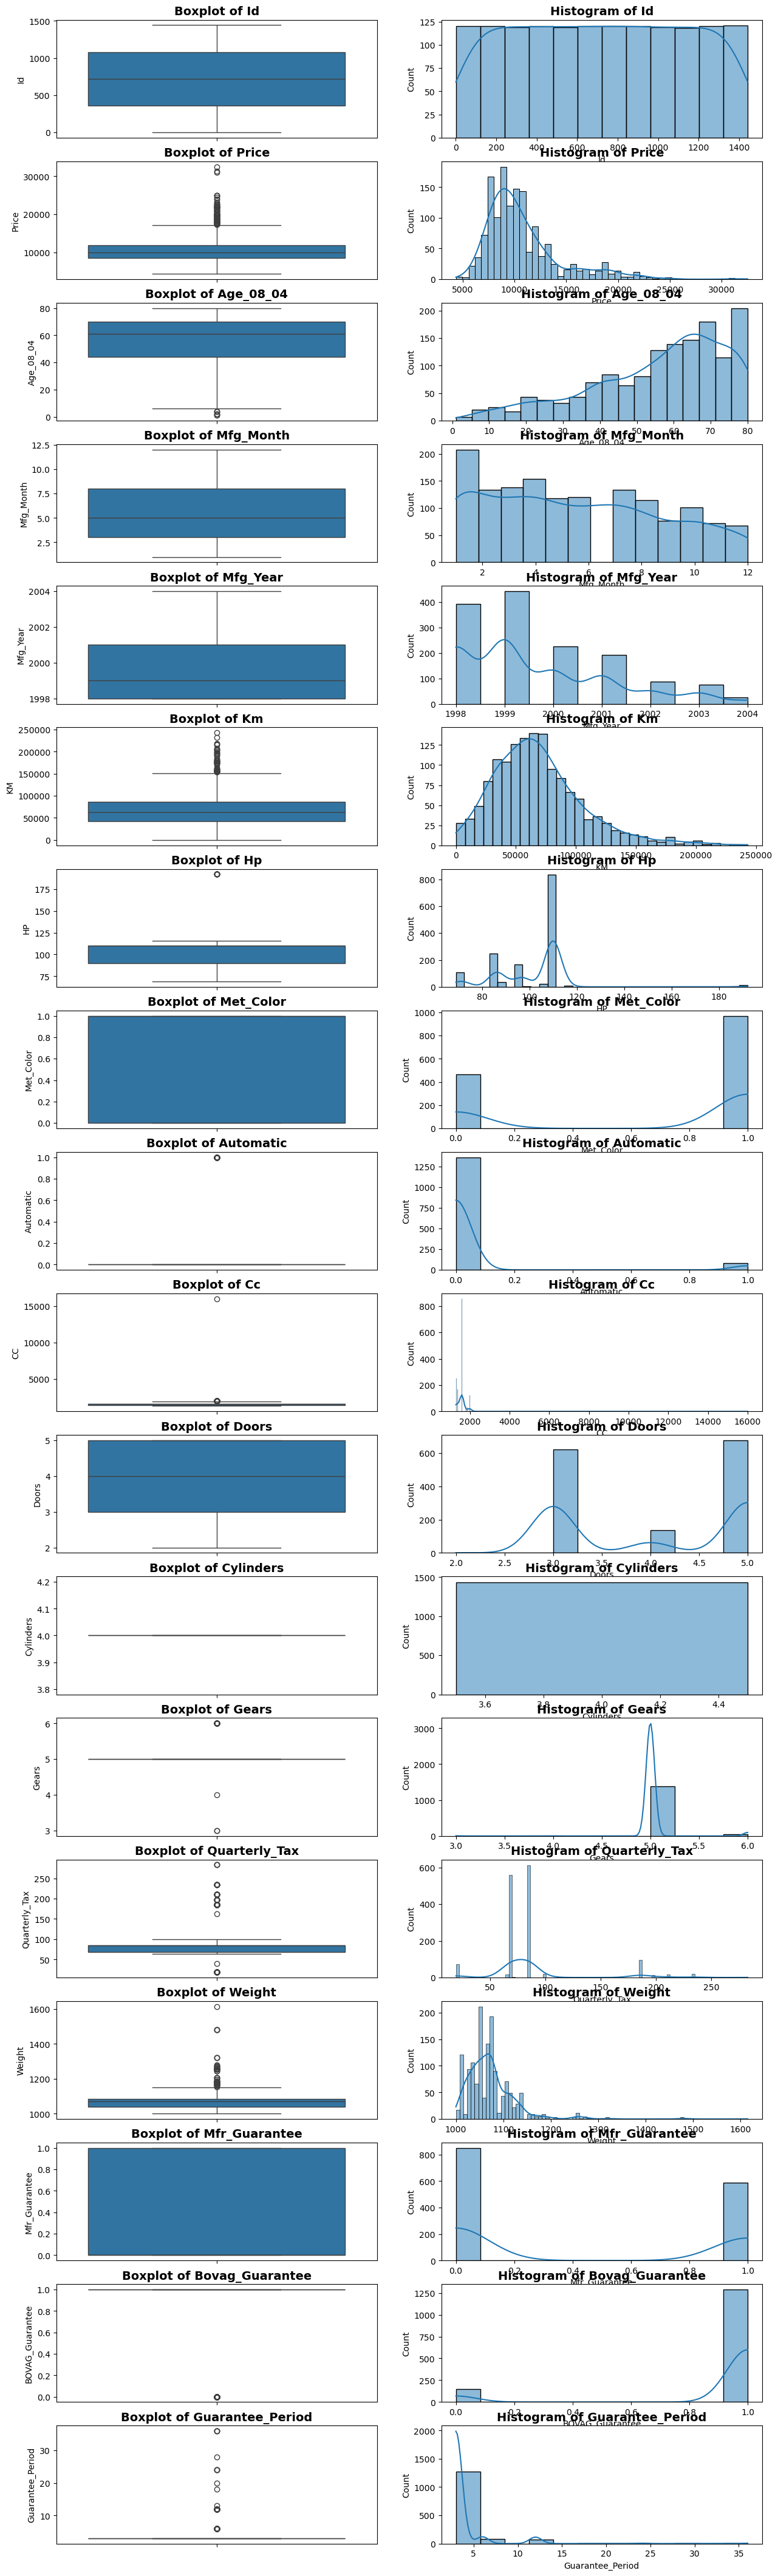

In [17]:
# Define numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Define numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed
num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2

fig, ax = plt.subplots(num_rows, 2, figsize=(15, num_rows * 3))
ax = ax.flatten()

# Numerical columns for plotting
for i, feature in enumerate(num_cols):
    # Create a boxplot of the column
    sns.boxplot(y=df[feature], ax=ax[2*i])

    ax[2*i].set_title('Boxplot of ' + feature.title(), fontsize=14, fontweight='bold')

    # Histogram of the column
    sns.histplot(x=df[feature], ax=ax[2*i + 1], kde=True)

    ax[2*i + 1].set_title('Histogram of ' + feature.title(), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

MOst of the included distributions are skewed, especially that of the KM, Weight, Mfg_Year, and Guarentee Period.


Correlation with Price:
Price                1.000000
Mfg_Year             0.885159
Boardcomputer        0.601292
Automatic_airco      0.588262
Weight               0.581198
CD_Player            0.481374
Airco                0.429259
Powered_Windows      0.356518
Central_Lock         0.343458
HP                   0.314990
ABS                  0.306138
Airbag_2             0.248974
Mistlamps            0.222083
Quarterly_Tax        0.219197
Mfr_Guarantee        0.197802
Doors                0.185326
Sport_Model          0.164121
Guarantee_Period     0.146627
CC                   0.126389
Met_Color            0.108905
Metallic_Rim         0.108564
Backseat_Divider     0.102569
Airbag_1             0.093588
Power_Steering       0.064275
Gears                0.063104
Parking_Assistant    0.044375
Automatic            0.033081
BOVAG_Guarantee      0.028133
Mfg_Month           -0.018138
Radio               -0.041887
Radio_cassette      -0.043179
Tow_Bar             -0.172369
KM             

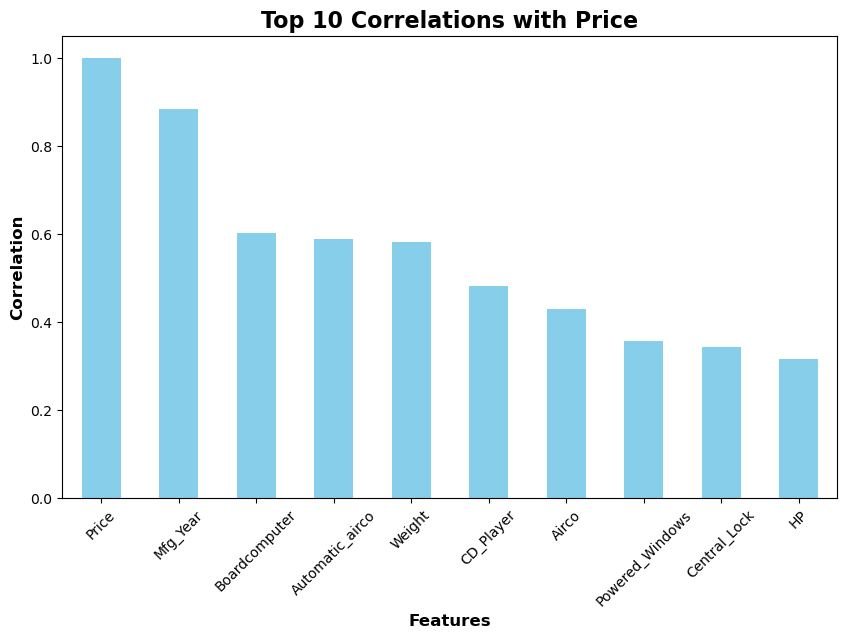

In [19]:
# Correlation with price
print("\nCorrelation with Price:")
numeric_df = df.select_dtypes(include=[np.number]) 
correlations = numeric_df.corr()['Price'].sort_values(ascending=False)
print(correlations)

# Only plotting the top 10 columns with high correlation
top_correlations = correlations.head(10)
plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Correlations with Price', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Correlation', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


#### Q2: Feature Understanding & Engineering
Which features might be most relevant for predicting a Corolla’s price? Can you create new features (or transform existing ones) to better capture a car’s value?

In [20]:
df["Mfg_Year"].head()

0    2002
1    2002
2    2002
3    2002
4    2002
Name: Mfg_Year, dtype: int64

In [27]:
# Age-related feature
current_year = 2025
df['Age'] = current_year - df['Mfg_Year']
df['Age_Squared'] = df['Age'] ** 2

# Mileage per year feature
df['Mileage_per_Year'] = df['KM'] / df['Age']

# Fuel efficiency feature
df['Fuel_Efficiency'] = df['HP'] / df['CC']

# Price per kilometer
df['Price_per_KM'] = df['Price'] / df['KM']

# Horsepower to age ratio
df['HP_Age_Ratio'] = df['HP'] / df['Age']

# Ensure fuel type columns exist
fuel_types = ['Fuel_CNG', 'Fuel_Diesel', 'Fuel_Petrol']
for fuel in fuel_types:
	if fuel not in df.columns:
		df[fuel] = 0

# New column for fuel type
df['Fuel_Type'] = df[fuel_types].idxmax(axis=1)
df = pd.get_dummies(df, columns=['Fuel_Type'], prefix='Fuel')

# Technology score
car_tech = ['ABS', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Mistlamps', 'Boardcomputer']
df['Technology_Score'] = df[car_tech].sum(axis=1)

# Safety score
car_safety = ['ABS', 'Airbag_1', 'Airbag_2']
df['Safety_Score'] = df[car_safety].sum(axis=1)

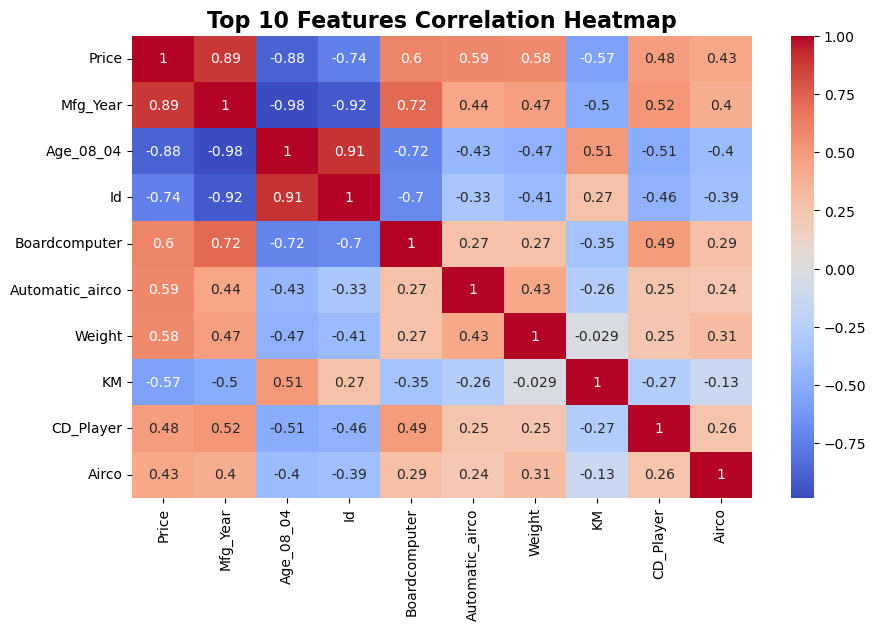

In [22]:
# Dataframe with only numerical values
numeric_df = df.select_dtypes(include=[np.number]) 

# Compute and sort the dataframe by the absolute value of their correlation to price
correlations = numeric_df.corr()['Price'].abs().sort_values(ascending=False)

# Create a heatmap showing top 10 features by correlations to price
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df[correlations.head(10).index].corr(), annot=True, cmap='coolwarm')
plt.title('Top 10 Features Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [23]:
#Testing the new columns
print(df.head())

   Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Powered_Windows  \
0         10      2002  46986    Diesel  90          1  ...               1   
1         10      2002  72937    Diesel  90          1  ...               0   
2          9      2002  41711    Diesel  90          1  ...               0   
3          7      2002  48000    Diesel  90          0  ...               0   
4          3      2002  38500    Diesel  90          0  ...               1   

   Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  \
0         

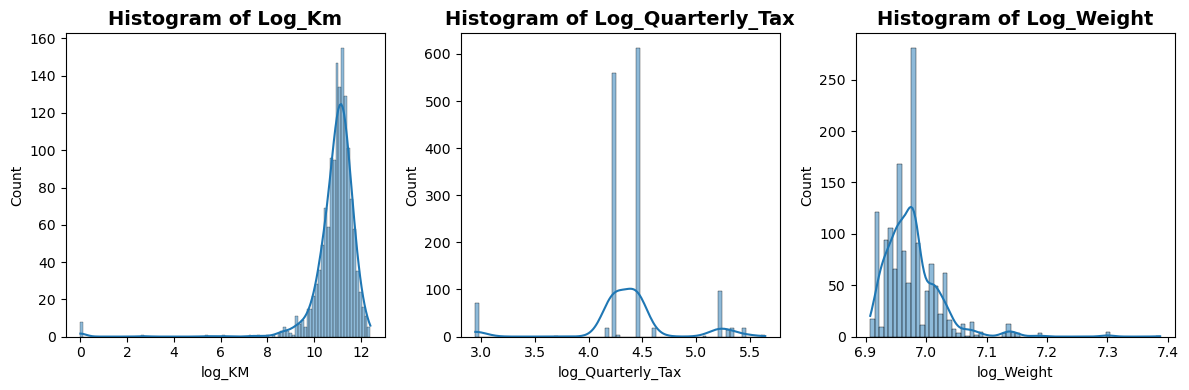

In [24]:
# Log transforming the KM, Quarterly_Tax, and Weight Columns
df['log_KM'] = np.log(df['KM'])
df['log_Quarterly_Tax'] = np.log(df['Quarterly_Tax'])
df['log_Weight'] = np.log(df['Weight'])

# Assign the logged features
logged_features = ['log_KM', 'log_Quarterly_Tax', 'log_Weight']

# Boxplot
fig, ax = plt.subplots(1,3, figsize= (12, 4))


for i, feature in enumerate(logged_features):
   # Histogram of the new distribution
   sns.histplot(df[feature], kde= True, ax= ax[i])

   ax[i].set_title('Histogram of ' + feature.title(), fontsize= 14, fontweight= 'bold')

plt.tight_layout()
plt.show()

In [25]:
# Add the above columns to dropped columns list


#### Q3: Model Selection Rationale
How do decision trees, random forests (or other ensembles), and SVMs differ in handling regression tasks, and why might these differences matter for predicting car prices?

Decision Trees work by splitting the data into subsets based on feature thresholds.
Advantages for car pricing:
- Can capture non-linear relationships such as how price might drop sharply after certain car age.
- Highly interpretable, since you can follow the exact logic of how a price was determined.
- Handles both numerical and categorical features.

Limitations for car pricing:
- Prone to overfitting.
- Can be unstable, since small changes in the data can lead to very different trees.
- Limitation for capturing price transitions.

Random Forests are an ensemble of multiple decision trees, each trained on random subsets of data and features.
Advantages for car pricing:
- Are more robust than single decision trees and reduces overfitting through average.
- Can handle complex interactions between features like how age and mileage jointly affect price.
- Provides feature importance rankings.
- Performs well with minimal tuning.

Limitations for car pricing:
- Less interpretable than single decision trees.
- Computationally more intensive.
- May struggle with extrapolation outside of the training data range.

SVMs work by finding a function that deviates from the actual price by at most ε while remaining as flat as possible.
Advantages for car pricing:
- They are good at handling non-linear relationships through kernel functions.
- Robust to outliers when using appropriate parameters.
- Can capture smooth price transitions better than single decision trees.

Limitations for car pricing:
- Sensitive to feature scaling, so it requires careful preprocessing.
- It's computationally expensive for large datasets.
- Can be challenging to select the appropriate kernel and parameters.
- Less interpretable than tree-based methods.

These differences matter for car pricin for several reasons:

- Data Characteristics:
Car prices often have non-linear relationships with its features, they also have a mix of categorical and numerical features.
The data tends to have the presence of outliers like luxury or rare models), so random forests handles these characteristics well.

- Dataset Size:
Random forests offer a good balance of performance and computational efficiency, which its important for model updates as new data comes in.

- Interpretability Requirements:
Dealerships need to explain price predictions to customers. Thus, tree-based methods provide better interpretability for the
need to understand feature importance for business decisions.

- Generalization:
Random forests and SVMs generally provide better generalization than single trees, which is important to avoid overfitting. Especially when there's a need to predict prices for new car configurations.

- Business Context:
Random forests are particularly suitable due to their robustness and feature importance capabilities. This is used when there's a need for reliable predictions across different price ranges.

Given these considerations, Random forests are a great choice for car price prediction, as they provide a good balance of accuracy, interpretability and robustness, while handling the specific characteristics of car pricing data correctly.


#### Q4: Baseline Modeling
After splitting the data, how do each of the baseline models (decision tree, random forest, SVM) perform without hyperparameter tuning?

In [35]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Model', 'Color'], drop_first=True)

# X and y variables from the dataframe
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
svm_model = SVR()

# Train and evaluate the models
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    baseline_results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Results
print("\nBaseline Model Results:")
for model, metrics in baseline_results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")



Baseline Model Results:

Decision Tree:
RMSE: 962.73
MAE: 697.65
R2: 0.93

Random Forest:
RMSE: 731.58
MAE: 533.41
R2: 0.96

SVM:
RMSE: 3685.20
MAE: 2418.44
R2: -0.02


In [37]:
# Add all of the error metric dictionaries to a comparison dataframe.
baseline_results_df = pd.DataFrame(baseline_results).T
print("\nBaseline Model Results:")
print(baseline_results_df)


Baseline Model Results:
                      RMSE          MAE        R2
Decision Tree   962.725129   697.652778  0.930536
Random Forest   731.579362   533.408889  0.959888
SVM            3685.201324  2418.438603 -0.017831


Checking the error metrics from each of the three models, it is clear that the random forest performed the best. The SVM model performed very poorly, which is likely a result of lack of hyperparameter tuning.

#### Q5: Hyperparameter Tuning
Which hyperparameters (e.g., max_depth for trees, C/gamma for SVM) are most crucial in optimizing your models, and why?

Utilize RandomSearchCV and/or GridSearchCV to identify the best params. 

Random Forest

In [48]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate and run randomized search with the above parameters
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

# Instantiate and run grid search with the above parameters
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

# Get and print the best parameters from randomized and grid search
rf_random_best_params = rf_random.best_params_
rf_grid_best_params = rf_grid.best_params_
print("Best RandomizedSearchCV parameters:", rf_random_best_params)
print("Best GridSearchCV parameters:", rf_grid_best_params)

Best RandomizedSearchCV parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best GridSearchCV parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [49]:
# Create an instance of the random forest regressor model with randomized parameters
rs_rf = RandomForestRegressor(**rf_random.best_params_, random_state= 42)

# Fit the data to the random forest regressor and calculate the error metrics
rs_rf_metrics = fit_evaluate(rs_rf, X_train, X_test, y_train, y_test, "Randomized Search Random Forest")


Randomized Search Random Forest Evaluation Metrics:
RMSE: 733.38
MAE: 534.27
R²: 0.960


In [50]:
# Create an instance of the random forest regressor model with grid parameters
gs_rf = RandomForestRegressor(**rf_grid.best_params_, random_state= 42)

# Fit the data to the random forest regressor and calculate the error metrics
gs_rf_metrics = fit_evaluate(gs_rf, X_train, X_test, y_train, y_test, "Grid Search Decision Tree")


Grid Search Decision Tree Evaluation Metrics:
RMSE: 733.38
MAE: 534.27
R²: 0.960


Decision Tree

In [43]:
# Define parameters for DecisionTreeRegressor
dt_params = {
	'max_depth': [None, 10, 20, 30],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4]
}

# Instantiate and run randomized search with the above parameters
dt_random = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), dt_params, n_iter=20, cv=5, random_state=42)
dt_random.fit(X_train, y_train)

# Instantiate and run grid search with the above parameters
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)

# Best parameters from randomized and grid search
dt_random_best_params = dt_random.best_params_
dt_grid_best_params = dt_grid.best_params_
print("\nBest Randomized Search Parameters:", dt_random_best_params)
print("Best Grid Search Parameters:", dt_grid_best_params)


Best Randomized Search Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}
Best Grid Search Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fit_evaluate(model, X_train, X_test, y_train, y_test, model_name):
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	
	mse = mean_squared_error(y_test, y_pred)
	rmse = np.sqrt(mse)
	mae = mean_absolute_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)
	
	print(f"\n{model_name} Evaluation Metrics:")
	print(f"RMSE: {rmse:.2f}")
	print(f"MAE: {mae:.2f}")
	print(f"R²: {r2:.3f}")
	
	return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Create an instance of the decision tree regressor model with randomized parameters
rs_dt = DecisionTreeRegressor(**dt_random.best_params_, random_state= 42)

# Fit the data to the decison tree regressor and calculate the error metrics
rs_dt_metrics = fit_evaluate(rs_dt, X_train, X_test, y_train, y_test, "Randomized Search Decision Tree")


Randomized Search Decision Tree Evaluation Metrics:
RMSE: 981.71
MAE: 721.09
R²: 0.928


In [45]:
# Create an instance of the decision tree regressor model with grid parameters
gs_dt = DecisionTreeRegressor(**dt_grid.best_params_, random_state= 42)

# Fit the data to the decison tree regressor and calculate the error metrics
gs_dt_metrics = fit_evaluate(gs_dt, X_train, X_test, y_train, y_test, "Grid Search Decision Tree")


Grid Search Decision Tree Evaluation Metrics:
RMSE: 981.71
MAE: 721.09
R²: 0.928


SVM

In [52]:
svm_random_parameters = {
    'C': np.logspace(-2, 2),
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-2, 2))
}

# Define parameter distributions for grid search
svm_grid_parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Randomized search with the above parameters
svm_random = RandomizedSearchCV(svm_model, svm_random_parameters, cv= 5, random_state= 42, n_jobs= -1)
svm_random.fit(X_train, y_train)

# Grid search with the above parameters
svm_grid = GridSearchCV(svm_model, svm_grid_parameters, cv= 5, n_jobs= -1)
svm_grid.fit(X_train, y_train)

svm_random_best_parameters = svm_random.best_params_
svm_grid_best_parameters = svm_grid.best_params_
print("Best RandomizedSearchCV parameters:", svm_random_best_parameters)
print("Best GridSearchCV parameters:", svm_grid_best_parameters)

Best RandomizedSearchCV parameters: {'kernel': 'linear', 'gamma': 0.012067926406393288, 'C': 1.9306977288832496}
Best GridSearchCV parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [53]:
# Instance of the SVM regressor model with random parameters
rs_svm = SVR(**svm_random.best_params_)

# SVM regressor and calculate the error metrics
rs_svm_metrics = fit_evaluate(rs_svm, X_train, X_test, y_train, y_test, "Randomized Search Support Vector Machine")


Randomized Search Support Vector Machine Evaluation Metrics:
RMSE: 1990.90
MAE: 1443.81
R²: 0.703


In [54]:
# Instance of the SVM regressor model with grid parameters
gs_svm = SVR(**svm_grid.best_params_)

# SVM regressor and calculate the error metrics
gs_svm_metrics = fit_evaluate(gs_svm, X_train, X_test, y_train, y_test, "Grid Search Support Vector Machine")


Grid Search Support Vector Machine Evaluation Metrics:
RMSE: 1367.52
MAE: 926.77
R²: 0.860


In [56]:
# Add all of the error metric dictionaries to a comparison dataframe with model names
df_optimized_comp = pd.DataFrame([rs_rf_metrics, gs_rf_metrics, rs_dt_metrics, gs_dt_metrics, rs_svm_metrics, gs_svm_metrics],
                                    index=['Randomized Search Random Forest', 'Grid Search Random Forest',
                                            'Randomized Search Decision Tree', 'Grid Search Decision Tree',
                                            'Randomized Search Support Vector Machine', 'Grid Search Support Vector Machine'])

print("\nOptimized Model Results:")
print(df_optimized_comp)


Optimized Model Results:
                                                 RMSE          MAE        R2
Randomized Search Random Forest            733.383533   534.265914  0.959690
Grid Search Random Forest                  733.383533   534.265914  0.959690
Randomized Search Decision Tree            981.705811   721.086683  0.927770
Grid Search Decision Tree                  981.705811   721.086683  0.927770
Randomized Search Support Vector Machine  1990.898443  1443.813858  0.702935
Grid Search Support Vector Machine        1367.517949   926.771365  0.859841


From the results, Random Forest both Randomized and Grid Search performs the best, achieving the lowest RMSE of 733.38, lowest MAE of 534.26, and highest R2 of 0.9597, meaning it explains about 96% of the variance in the data. Decision Trees are slightly worse, with higher RMSE of 981.71 and lower R2 of 0.9278, but still perform well. However, Support Vector Machine (SVM) does not perform well for this problem, as it has the highest RMSE and MAE, with a significantly lower R² score. This suggests that Random Forest is the best model for this dataset, while SVM struggles to fit the data properly. The similarity in results between Randomized and Grid Search suggests that both methods were effective at hyperparameter tuning for these models.

#### Q6: Ensemble Comparison
How do random forest and gradient boosting (or another ensemble) compare in terms of predictive accuracy and overfitting risk?

In [17]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Random Forest and Gradient Boosting comparison
rf_best = rf_random.best_estimator_
models_comparison = {
    'Random Forest': rf_best,
    'Gradient Boosting': gb_model
}

for name, model in models_comparison.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    print(f"\n{name} Results:")
    print(f"Training R2: {r2_score(y_train, train_pred):.3f}")
    print(f"Testing R2: {r2_score(y_test, test_pred):.3f}")
    print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, train_pred)):.3f}")
    print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, test_pred)):.3f}")



Random Forest Results:
Training R2: 0.964
Testing R2: 0.917
Training RMSE: 684.352
Testing RMSE: 1049.350

Gradient Boosting Results:
Training R2: 0.942
Testing R2: 0.926
Training RMSE: 875.149
Testing RMSE: 991.889


In [62]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Fit the random forest and Gradient Boosting models to the data
gs_rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predict the training and testing data for each model
rf_train_preds = gs_rf.predict(X_train)
rf_test_preds = gs_rf.predict(X_test)
gb_train_preds = gb.predict(X_train)
gb_test_preds = gb.predict(X_test)

# Compute the training and testing R2 scores for each model
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)
gb_train_r2 = r2_score(y_train, gb_train_preds)
gb_test_r2 = r2_score(y_test, gb_test_preds)

# Print the results
print(f"Random Forest - Train R2: {rf_train_r2:.4f}")
print(f"Random Forest - Test R2: {rf_test_r2:.4f}")
print(f"Gradient Boosting - Train R2: {gb_train_r2:.4f}")
print(f"Gradient Boosting - Test R2: {gb_test_r2:.4f}")

Random Forest - Train R2: 0.9926
Random Forest - Test R2: 0.9597
Gradient Boosting - Train R2: 0.9737
Gradient Boosting - Test R2: 0.9572


Random Forest achieves an R2 of 0.9926 on the training set and 0.9597 on the test set. The slight drop between training and test R2 suggests that the model generalizes well to unseen data but might be slightly overfitting.

Gradient Boosting has a training R2 of 0.9737 and a test R2 of 0.9572. The fact that its training and test R2 values are closer together suggests it is less prone to overfitting compared to Random Forest.

Both models perform exceptionally well, but Random Forest has a slightly higher training R2, indicating it fits the training data better, while Gradient Boosting is slightly more balanced between training and test performance. Since their test R2 values are nearly identical (0.9597 vs. 0.9572), either model could be a strong choice, but Gradient Boosting might be preferable if avoiding overfitting is a priority.

#### Q7: Feature Importance & Interpretability
Based on the tree-based models’ feature importances, which vehicle attributes contribute most to the price, and do these insights align with your domain intuition?

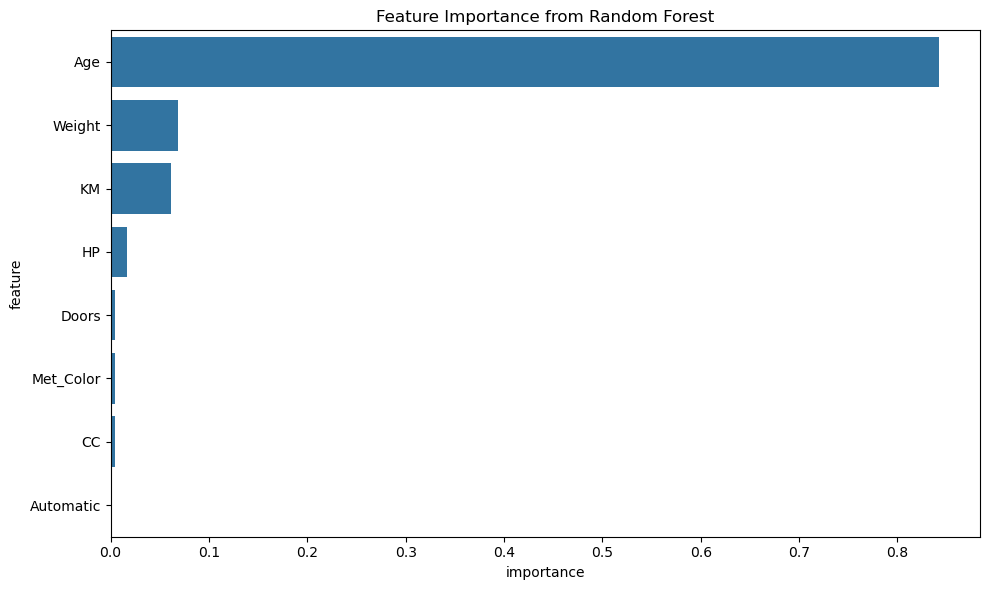

In [18]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_best.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

Gradient Boosting Feature Importance:

- The most important feature is Mfg_Year (Manufacturing Year), contributing the most to predictions.
- Age_08_04 (vehicle age) and Id are also highly influential.
- Other important features include Price_per_KM (cost per kilometer driven) and HP_Age_Ratio.
- The model also considers Weight, KM, and tax-related variables but with lower importance.

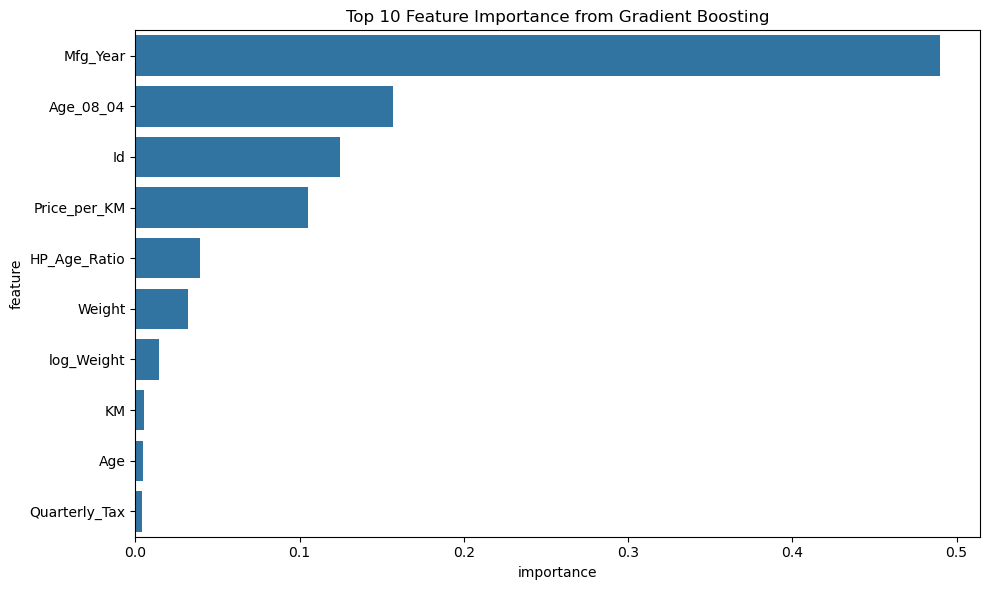

In [67]:
# Extract the importance score of each feature for the Gradient Boosting model
gb_feature_importance = gb.feature_importances_

# Extract feature names from the dataframe X
features = X.columns

# Create a dataframe of feature importances
gb_feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': gb_feature_importance
})

# Sort the dataframe by feature importance
gb_feature_importance_df = gb_feature_importance_df.sort_values('importance', ascending=False)

# Select the top 10 features
top_10_features = gb_feature_importance_df.head(10)

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_10_features)
plt.title('Top 10 Feature Importance from Gradient Boosting')
plt.tight_layout()
plt.show()

Random Forest Feature Importance:

- Age is the most dominant feature, having an overwhelming influence on predictions.
- Weight and KM (mileage) are also significant but contribute much less than Age.
- Other minor contributors include HP (horsepower), number of doors, metallic color, and whether the car is automatic.


#### Q8: Evaluation Metrics
Apart from R², which metrics (e.g., MAE, RMSE) help you assess model performance for this pricing problem, and why might they be more informative?


Best Random Forest Model Evaluation Metrics:
RMSE: 733.38
MAE: 534.27
R²: 0.960
MAPE: 5.18%


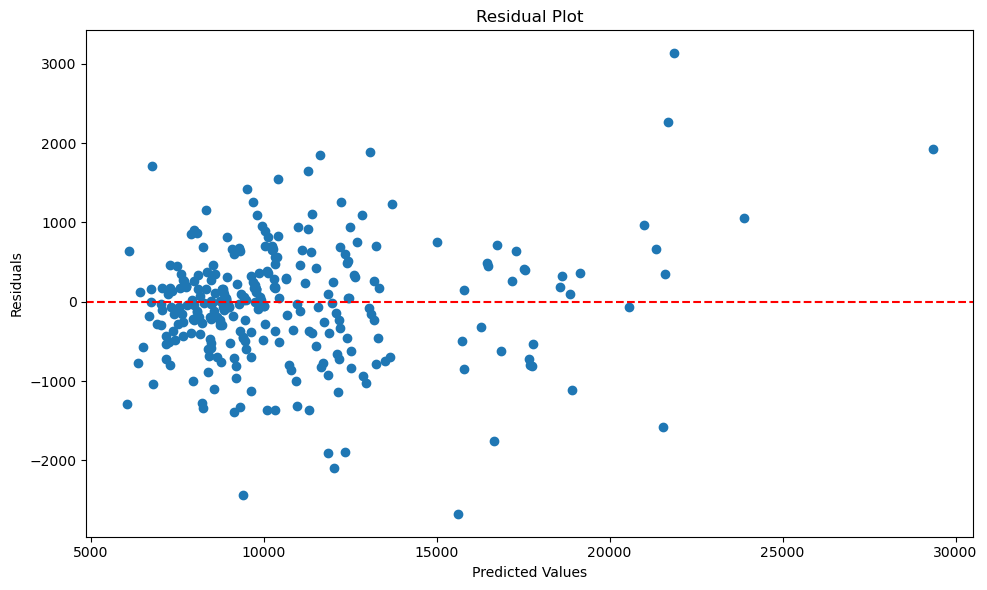

In [69]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.3f}")
    print(f"MAPE: {mape:.2f}%")

# Best model
best_model = rf_random.best_estimator_
y_pred_best = best_model.predict(X_test)
evaluate_model(y_test, y_pred_best, "Best Random Forest Model")

# Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

Apart from R2, which measures how well the model explains variance in the data, other key metrics like RMSE, MAE, and MAPE provide deeper insights into the model’s performance. RMSE = 733.38 represents the standard deviation of the model’s errors, giving more weight to larger errors, which can be crucial in pricing problems where significant over or underestimation can be costly. MAE = 534.27 provides the average absolute difference between predicted and actual values, making it easier to interpret in terms of real-world price deviations.

MAPE = 5.18% expresses the error as a percentage of actual values, making it useful for understanding relative accuracy regardless of price scale. These metrics are valuable because they quantify the actual error magnitude, helping assess how much predictions deviate from real prices, while R² alone only indicates the proportion of variance explained. Additionally, the residual plot helps visualize error distribution and potential biases in predictions.

#### Q9: Actionable Insights
Which model would you recommend for the dealership’s pricing tool, and what policy or business decisions could be made based on the model’s predictions and feature importances?

In [73]:
# Calculate the metrics for the Gradient Boosting model
gb_metrics = fit_evaluate(gb, X_train, X_test, y_train, y_test, "Gradient Boosting")

# Display the results of all the models
df_best_each = pd.DataFrame([gs_dt_metrics, gs_rf_metrics, gs_svm_metrics, gb_metrics, rs_rf_metrics],
                            index=['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting', 'Best Random Forest'])
print("\nBest Model Results:")
print(df_best_each)


Gradient Boosting Evaluation Metrics:
RMSE: 755.54
MAE: 570.82
R²: 0.957

Best Model Results:
                               RMSE         MAE        R2
Decision Tree            981.705811  721.086683  0.927770
Random Forest            733.383533  534.265914  0.959690
Support Vector Machine  1367.517949  926.771365  0.859841
Gradient Boosting        755.535551  570.817260  0.957218
Best Random Forest       733.383533  534.265914  0.959690


The best-performing model is Random Forest, as it has the highest R2 score of 0.960, the lowest RMSE of 733.38, and the lowest MAE of 534.27 compared to the Decision Tree, Support Vector Machine (SVM), and Gradient Boosting models. This indicates that the Random Forest model provides the most accurate predictions while maintaining a balance between variance and bias. The SVM model performed the worst, with the highest RMSE and MAE, showing that it is not suitable for this dataset. Gradient Boosting also performed well, with an R2 of 0.957, but its RMSE and MAE are slightly higher than those of Random Forest.

The dealership can use the Random Forest model to:
- Price cars more accurately based on attributes like mileage, age, horsepower, and color.
- Improve customer trust by justifying pricing with data-driven insights.
- Optimize trade-in offers by predicting resale values based on vehicle features.
- Increase sales conversion by setting competitive and fair prices aligned with market trends.

To determine the most influential features, I extracted the feature importance from the Random Forest model. The most impactful attributes are:
- Age: Older cars tend to depreciate faster.
- KM (Mileage): Higher mileage typically reduces resale value.
- Weight: Heavier vehicles may have a different price trend.
- Horsepower (HP): Higher HP often correlates with higher prices.

The dealership can leverage this model in multiple ways:
- Adjust pricing dynamically based on market trends and vehicle attributes.
- Highlight the most valuable features (low mileage, high horsepower) in advertisements.
- Stock more of the vehicles that hold value better over time.
- Provide data-driven justifications for pricing, improving negotiations with customers.

With Random Forest as the best model, the dealership can use it as a decision-making tool to ensure fair, competitive, and market-aligned pricing strategies. If explainability is needed, Gradient Boosting could be an alternative, as it considers multiple interactions between features.

#### Q10: Reflection
Why did certain hyperparameters improve or worsen performance? What additional data or modeling approaches could further improve results?

Hyperparameter tuning is critical for improving a model’s performance and generalization. Adjusting hyperparameters can help models avoid overfitting, improve accuracy, and reduce error metrics.

- Decision Tree, with an R² of 0.9277 and an RMSE of 981.71, still exhibits a tendency to overfit due to its ability to grow deep trees. Without pruning techniques such as limiting max depth or min samples split, the tree may capture noise instead of patterns, reducing its ability to generalize well.

- Random Forest, with an R² of 0.9597 and an RMSE of 733.38, showed significant improvement after hyperparameter tuning. This tuning process helped enhance generalization performance, leading to a more reliable model with reduced error.

- Support Vector Machine (SVM), with an R² of 0.8598 and an RMSE of 1367.52, underperformed compared to Random Forest and Gradient Boosting. SVM models are highly sensitive to hyperparameters like C and gamma, and an inappropriate choice of kernel function or lack of feature scaling might have contributed to its suboptimal performance. The default linear kernel may not effectively capture nonlinear relationships in the data.

By fine-tuning hyperparameters, Random Forest emerged as the best-performing model, demonstrating the importance of careful parameter selection to enhance predictive accuracy and generalization.

To further enhance model accuracy and reduce prediction errors, incorporating additional data and feature engineering could provide more refined and robust predictions. Additional features like car condition, number of previous owners, and external factors such as seasonality could help capture real-world pricing trends. Integrating real-time market data from similar vehicle models, as well as macroeconomic indicators like inflation and economic conditions, could further improve predictive performance.

Feature engineering techniques could also be beneficial, such as:
- Applying a log transformation to KM (mileage) to capture non-linear depreciation effects, as cars tend to lose value at a decreasing rate over time.
- Creating interaction features by combining existing attributes, which may reveal deeper relationships influencing car pricing (e.g., an interaction between age and horsepower might reflect performance depreciation).
- Binning categorical variables (such as age groups) to better capture price variations across different segments.

These enhancements could help Gradient Boosting and Random Forest models extract more meaningful patterns, leading to more accurate price estimations and better generalization to unseen data.

Beyond Random Forest, other machine learning models could be explored to further enhance predictive accuracy and capture complex relationships in the data:
1.	Gradient Boosting: With an R2 of 0.957 and an RMSE of 755.54, Gradient Boosting performed nearly as well as Random Forest. When fine-tuned properly, boosting algorithms can often outperform Random Forest by capturing complex patterns and handling nonlinear relationships effectively.

2.	Neural Networks: If a larger dataset is available, deep learning models could learn intricate pricing patterns that traditional tree-based models might miss. Neural networks excel at detecting subtle interactions between variables but require more data and computational power.

3.	Hybrid Models: A combination of tree-based models and regression techniques could leverage the strengths of both approaches, improving predictive stability and interpretability.

The most significant performance gains in this study were achieved through hyperparameter tuning of the Random Forest model, optimizing tree depth and estimators. However, Gradient Boosting emerged as a strong alternative, offering comparable accuracy. Incorporating additional features such as market trends, real-time pricing, and economic indicators could further refine predictions. Exploring alternative models like XGBoost or neural networks may provide additional improvements, especially for more complex datasets.